# DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS

### **Import Libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Data**

In [4]:
data = pd.read_csv("blinkit_data.csv")

### **Size of Data**

In [5]:
print("Size of Data: ",data.shape)

Size of Data:  (8523, 12)


### **Columns in Data**

In [6]:
list(data.columns)

['Item Fat Content',
 'Item Identifier',
 'Item Type',
 'Outlet Establishment Year',
 'Outlet Identifier',
 'Outlet Location Type',
 'Outlet Size',
 'Outlet Type',
 'Item Visibility',
 'Item Weight',
 'Sales',
 'Rating']

### **Sample Data**

In [7]:
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### **Datatypes**

In [8]:
data.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **Data Cleaning**

In [9]:
print(data["Item Fat Content"].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [ ]:
data["Item Fat Content"].replace({"LF":"Low Fat", "reg":"Regular", "low fat":"Low Fat"},inplace=True)

In [11]:
print(data["Item Fat Content"].unique())

['Regular' 'Low Fat']


## BUSINESS REQUIREMENTS

### **KPI's REQUIREMENTS**

In [12]:
# Total Sales
total_sales = data["Sales"].sum()

# Average Sales per Order
average_sales_per_order = data["Sales"].mean()

# Number of Items Sold
no_of_items_sold = data["Sales"].count()

# Average Rating
average_ratings = data["Rating"].mean()

# Display
print(f"Total Sales: ${total_sales:,.1f}")
print(f"Average Sales per Order: ${average_sales_per_order:,.1f}")
print(f"Number of Items Sold: {no_of_items_sold:,.1f}")
print(f"Average Rating: {average_ratings:,.1f}")

Total Sales: $1,201,681.5
Average Sales per Order: $141.0
Number of Items Sold: 8,523.0
Average Rating: 4.0


### **CHARTS REQUIREMENTS**

### **Total Sales by Fat Content**

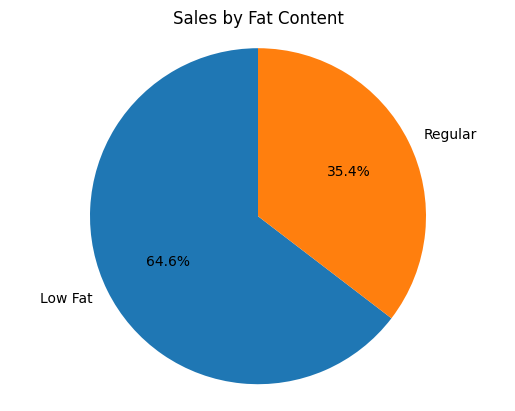

In [ ]:
sales_by_fat = data.groupby(data["Item Fat Content"])["Sales"].sum()

plt.pie(sales_by_fat, 
        labels=sales_by_fat.index, 
        autopct="%.1f%%",
        startangle=90)
plt.title("Sales by Fat Content")
plt.axis("equal")
plt.show()

### **Total Sales by Item Type**

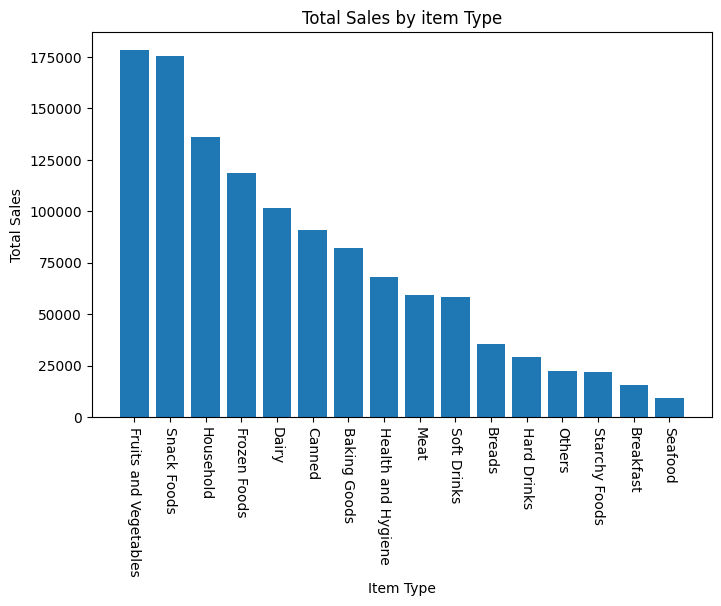

In [23]:
sales_by_item_type = data.groupby(data["Item Type"])["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
bars = plt.bar(sales_by_item_type.index, sales_by_item_type.values)
plt.xticks(rotation=-90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by item Type")
plt.show()

### **Fat Content by Outlet for Total Sales**

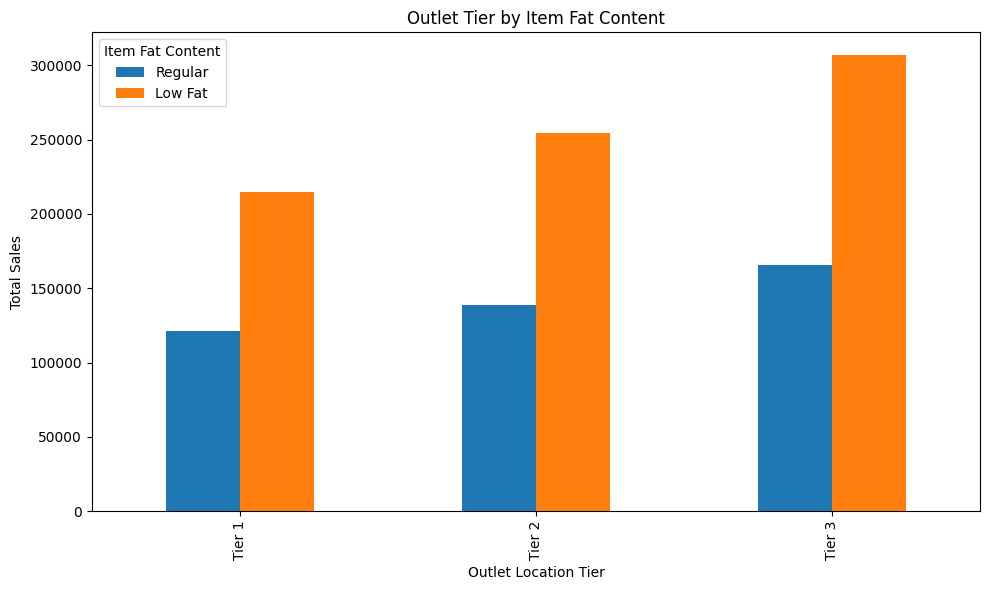

In [36]:
grouped = data.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum().unstack()
grouped = grouped[["Regular","Low Fat"]]

ax = grouped.plot(kind="bar",title="Outlet Tier by Item Fat Content", figsize=(10, 6))
plt.xlabel("Outlet Location Tier")
plt.ylabel("Total Sales")
plt.legend(title="Item Fat Content")
plt.tight_layout()
plt.show()

### **Total Sales by Outlet Establishment**

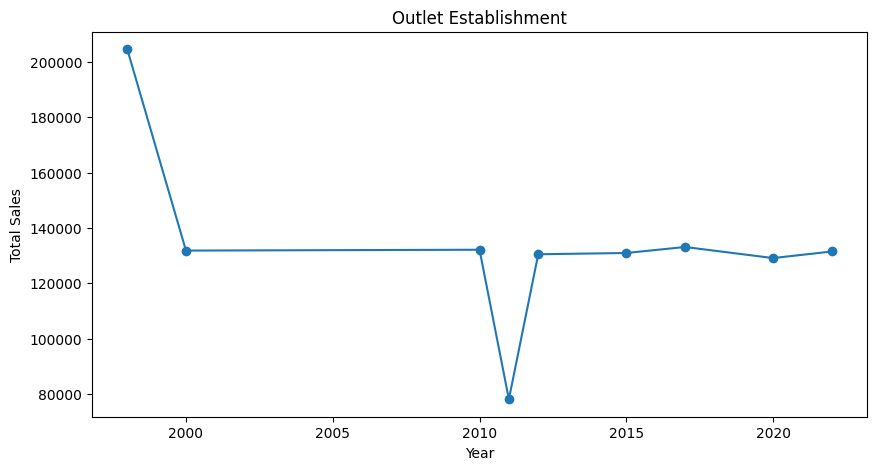

In [40]:
sales_by_year = data.groupby(data['Outlet Establishment Year'])["Sales"].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Outlet Establishment")
plt.show()

### **Sales by Outlet Size**

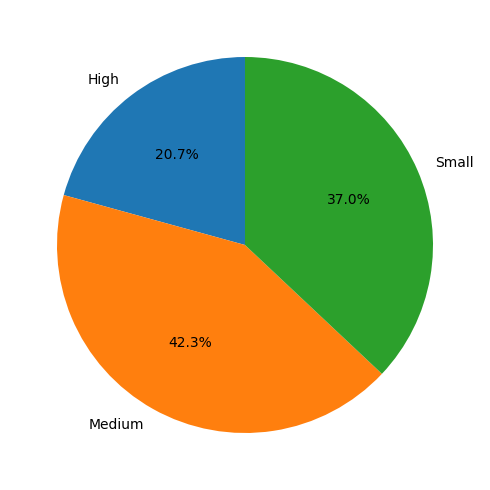

In [41]:
sales_by_size = data.groupby(data["Outlet Size"])["Sales"].sum()

plt.figure(figsize=(8,5))
plt.pie(sales_by_size,
        labels=sales_by_size.index,
        autopct="%.1f%%",
        startangle=90)
plt.tight_layout()
plt.show()